In [799]:
# NAME:           THEMBA NGOBENI
# STUDENT NUMBER: 1334236
# Assignment I:   LINEAR REGRESSION

import numpy as np

import pandas as pd

import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_theme(style="white")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [800]:
# IMPORT DATA
data=pd.read_csv("data1.csv")
data.head()

# sqft_living,sqft_lot

,CBO (X1),LCOM (X2),RFC (X3),WMC (X4),Defects
0,24,100,110,73,106.0
1,19,100,78,30,79.5
2,13,88,99,99,38.5
3,21,100,68,30,90.5
4,17,90,69,36,54.5


In [801]:
my_data=data.drop(["RFC (X3)","WMC (X4)"],axis=1)
my_data.head()

,CBO (X1),LCOM (X2),Defects
0,24,100,106.0
1,19,100,79.5
2,13,88,38.5
3,21,100,90.5
4,17,90,54.5


In [802]:
X1=my_data.iloc[:,0]
X2=my_data.iloc[:,1]
Y=my_data.iloc[:,2]

In [804]:
def LR(X1,X2,Y,learning_rate,iteration):
#     learning_rate=0.0001  
#     iteration=1000  
    
    theta_0=0
    theta_1=0
    theta_2=0
    n=float(len(X1)) 
    J_theta=np.zeros(iteration)

    for i in range(iteration): 
        h=theta_0 + theta_1*X1 + theta_2 * X2 
        diff=h-Y
        J=(1/2*n)*sum(diff*diff)  

        J_theta[i]=J
        d_theta_0=(1/n)*sum(diff) 
        d_theta_1=(1/n)*sum(X1*(diff)) 
        d_theta_2=(1/n)*sum(X2*(diff)) 

        theta_0=theta_0-learning_rate*d_theta_0 
        theta_1=theta_1-learning_rate*d_theta_1
        theta_2=theta_2-learning_rate*d_theta_2

    print (" θ0: {} | θ1: {} |  θ2: {} ".format(theta_0,theta_1,theta_2))  
    h=theta_0+ theta_1*X1 + theta_2*X2

    return J_theta,theta_0,theta_1

In [805]:
J_theta,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.0001,iteration=1000)

 θ0: 0.05175929612660274 | θ1: 3.606156390873416 |  θ2: 0.005365208668902871 


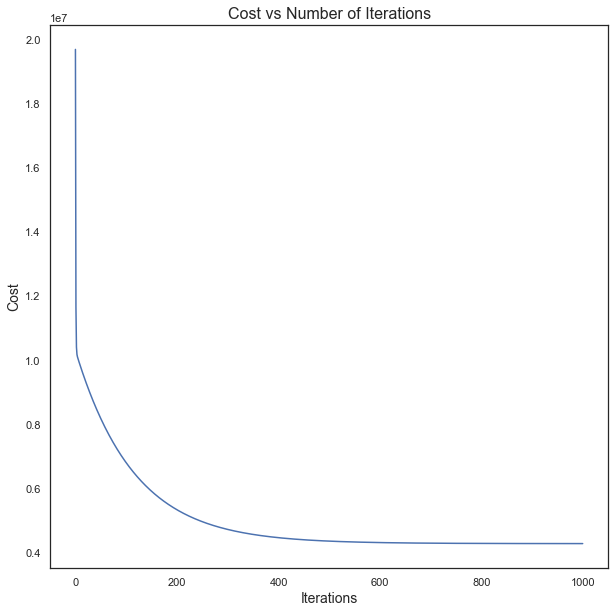

Lowest cost=4271851.785517545
Lowest cost=4271851.785517545


In [806]:
fig, ax = plt.subplots(nrows=1,figsize=(10,10))
sns.set()
ax = sns.lineplot(x=np.arange(0,1000), y=J_theta[:1000], ax=ax)
ax.set_xlabel("Iterations", fontdict={"fontsize":14})
ax.set_ylabel("Cost", fontdict={"fontsize":14})
ax.set_title("Cost vs Number of Iterations", fontdict={"fontsize":16})
plt.show()
print("Lowest cost="+str(np.min(J_theta)))
print("Lowest cost="+str(J_theta[-1]))

In [807]:
J_theta_1,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.000001,iteration=500)
J_theta_2,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.0000003,iteration=500)
J_theta_3,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.0000005,iteration=500)
J_theta_4,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.00000001,iteration=500)
J_theta_5,theta_0,theta_1=LR(X1,X2,Y,learning_rate=0.00000009,iteration=500)


 θ0: 0.005887630599532571 | θ1: 0.11553941000473471 |  θ2: 0.3537772246442862 
 θ0: 0.003129939307449321 | θ1: 0.0473950550882928 |  θ2: 0.22602332115330445 
 θ0: 0.004274011977612004 | θ1: 0.07021928345020946 |  θ2: 0.2937473053684147 
 θ0: 0.00014809868078078035 | θ1: 0.0019860686832112668 |  θ2: 0.011389773168278943 
 θ0: 0.001200943540439022 | θ1: 0.016650943560458847 |  θ2: 0.09088126329784336 


In [808]:
costs = pd.DataFrame({
    "i": np.arange(0,500),
    "cost_1":J_theta_1,
    "cost_2":J_theta_2,
    "cost_3":J_theta_3,
    "cost_4":J_theta_4,
    "cost_5":J_theta_5
})

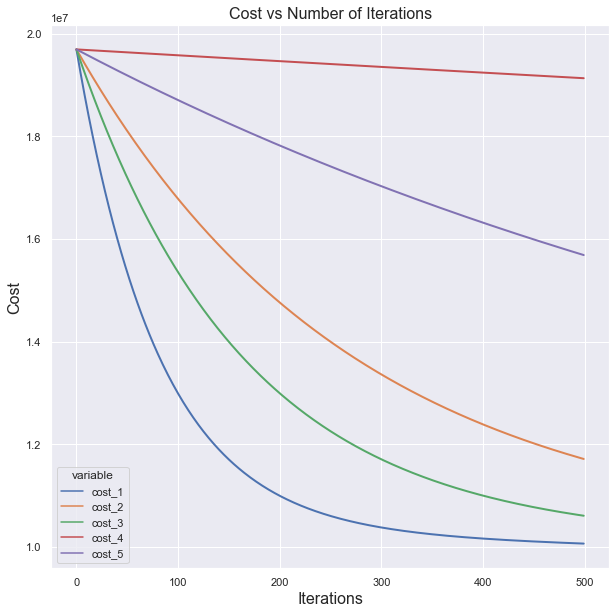

In [809]:
fig, ax = plt.subplots(nrows=1, figsize=(10,10))
sns.set()
ax = sns.lineplot(x="i", y="value", hue="variable", data=pd.melt(costs, ["i"]),linewidth = 2,  ax=ax)
ax.set_xlabel("Iterations", fontdict={"fontsize":16})
ax.set_ylabel("Cost", fontdict={"fontsize":16})
ax.set_title("Cost vs Number of Iterations", fontdict={"fontsize":16})
plt.show()